In [23]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

file_name = '/Users/sagarbochela/Desktop/Capstone proj/rreturns data.csv'

try:
    if os.path.exists(file_name):
        print(f"Loading file: {file_name}")
        df = pd.read_csv(file_name)
    else:
        raise FileNotFoundError(f"File {file_name} not found.")
except Exception as e:
    print(f"Error: {e}")
    raise SystemExit("Ensure the file is in the correct path and try again.")

print("Dataset loaded successfully. Here’s a summary:")
print(df.info())
print("\nFirst few rows of the dataset:")
print(df.head())

print("\nUnique values in 'Churn Status':")
print(df['Churn Status'].unique())

df['Churn Status'] = df['Churn Status'].str.strip().map({'Yes': 1, 'No': 0})

if df['Churn Status'].isnull().any():
    print("\nInvalid values found in 'Churn Status':")
    print(df[df['Churn Status'].isnull()])
    raise ValueError("Ensure 'Churn Status' contains only 'Yes' and 'No'.")

df['return_date'] = pd.to_datetime(df['return_date'], errors='coerce')
df['days_since_return'] = (pd.Timestamp.now() - df['return_date']).dt.days

df = df.drop(columns=['return_date'])

X = df.drop(columns=['Churn Status'])
y = df['Churn Status']

X = pd.get_dummies(X, columns=['product_id', 'store_id'], drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

churn_rate = y.mean() * 100
print(f"\nOverall Churn Rate: {churn_rate:.2f}%")


Loading file: /Users/sagarbochela/Desktop/Capstone proj/rreturns data.csv
Dataset loaded successfully. Here’s a summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   return_date   1000 non-null   object
 1   product_id    1000 non-null   int64 
 2   store_id      1000 non-null   int64 
 3   quantity      1000 non-null   int64 
 4   Churn Status  1000 non-null   object
dtypes: int64(3), object(2)
memory usage: 39.2+ KB
None

First few rows of the dataset:
  return_date  product_id  store_id  quantity Churn Status
0    1/1/1997         250         6         1           No
1    1/1/1997         628         6         1           No
2    1/1/1997         869         6         1           No
3    1/2/1997         469        11         1           No
4    1/2/1997         532        23         2         Yes 

Unique values in 'Churn Status':
['No

Dataset loaded successfully.

Available columns in the dataset:
Index(['return_date', 'product_id', 'store_id', 'quantity', 'Churn Status'], dtype='object')

First few rows of the dataset:
  return_date  product_id  store_id  quantity Churn Status
0    1/1/1997         250         6         1           No
1    1/1/1997         628         6         1           No
2    1/1/1997         869         6         1           No
3    1/2/1997         469        11         1           No
4    1/2/1997         532        23         2         Yes 


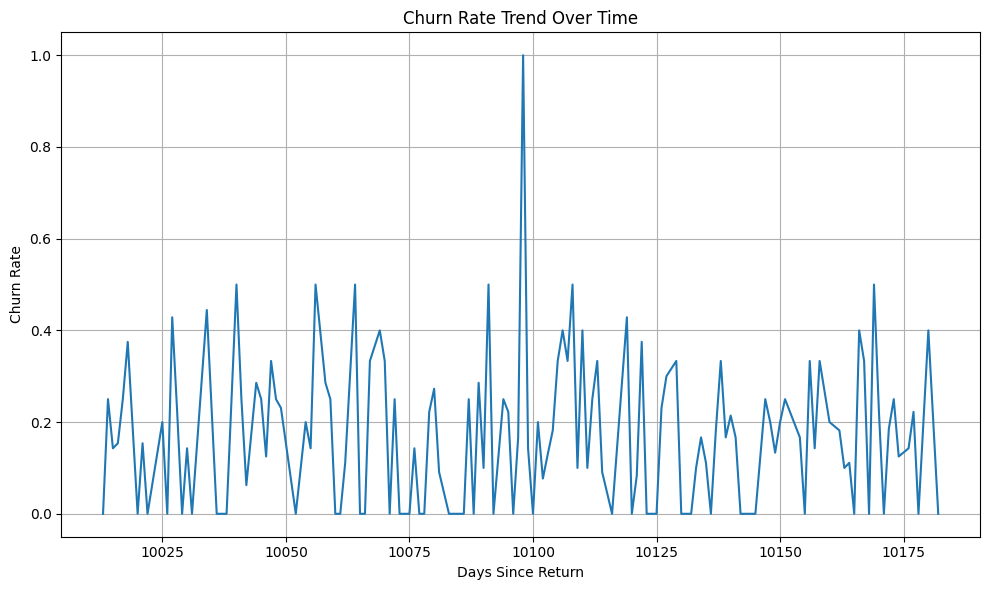

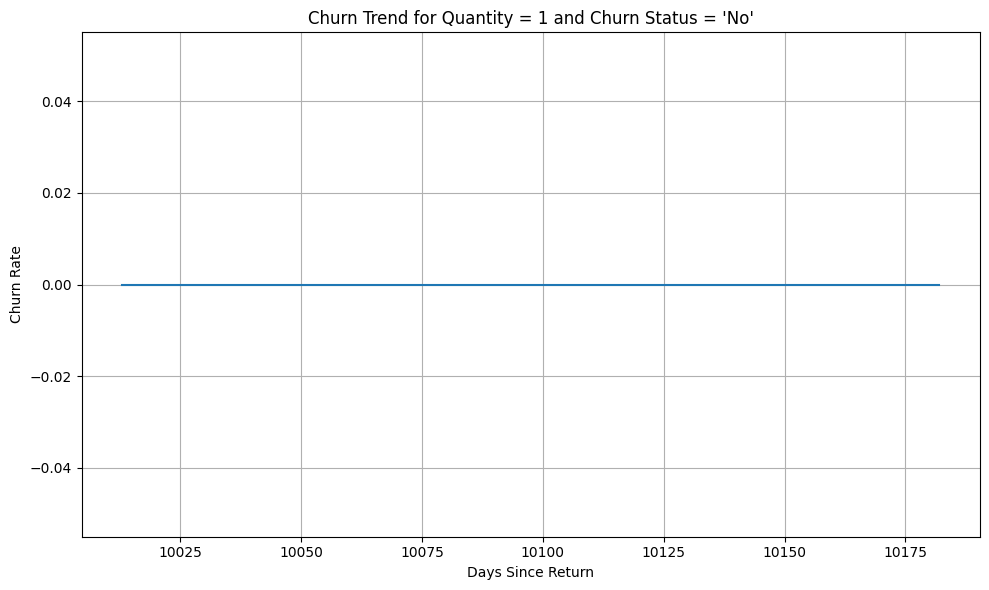

In [21]:
import os
import pandas as pd
import matplotlib.pyplot as plt

file_path = '/Users/sagarbochela/Desktop/Capstone proj/rreturns data.csv'

try:
    df = pd.read_csv(file_path)
    print("Dataset loaded successfully.")
except FileNotFoundError:
    raise SystemExit(f"File not found at {file_path}. Please check the file path.")

print("\nAvailable columns in the dataset:")
print(df.columns)

df.columns = df.columns.str.strip()

print("\nFirst few rows of the dataset:")
print(df.head())

if 'return_date' not in df.columns:
    print("\nWarning: 'return_date' column is missing or named differently.")
    raise KeyError("'return_date' column is missing.")

df['Churn Status'] = df['Churn Status'].str.strip().map({'Yes': 1, 'No': 0})

if df['Churn Status'].isnull().any():
    print("\nInvalid or missing values in 'Churn Status'.")
    print(df[df['Churn Status'].isnull()])
    raise ValueError("Ensure 'Churn Status' contains only 'Yes' and 'No'.")

df['return_date'] = pd.to_datetime(df['return_date'], errors='coerce')

if df['return_date'].isnull().any():
    print("\nWarning: Some 'return_date' values could not be converted to datetime.")
    print(df[df['return_date'].isnull()])

df['days_since_return'] = (pd.Timestamp.now() - df['return_date']).dt.days
df = df.drop(columns=['return_date'])

churn_conditions = df[(df['quantity'] == 1) & (df['Churn Status'] == 0)]

plt.figure(figsize=(10, 6))
df.groupby(df['days_since_return'])['Churn Status'].mean().plot()
plt.title("Churn Rate Trend Over Time")
plt.xlabel("Days Since Return")
plt.ylabel("Churn Rate")
plt.grid(True)
plt.tight_layout()
plt.show()

if not churn_conditions.empty:
    plt.figure(figsize=(10, 6))
    churn_conditions.groupby(churn_conditions['days_since_return'])['Churn Status'].mean().plot()
    plt.title("Churn Trend for Quantity = 1 and Churn Status = 'No'")
    plt.xlabel("Days Since Return")
    plt.ylabel("Churn Rate")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


Dataset loaded successfully.

Available columns in the dataset:
Index(['return_date', 'product_id', 'store_id', 'quantity', 'Churn Status'], dtype='object')

First few rows of the dataset:
  return_date  product_id  store_id  quantity Churn Status
0    1/1/1997         250         6         1           No
1    1/1/1997         628         6         1           No
2    1/1/1997         869         6         1           No
3    1/2/1997         469        11         1           No
4    1/2/1997         532        23         2         Yes 


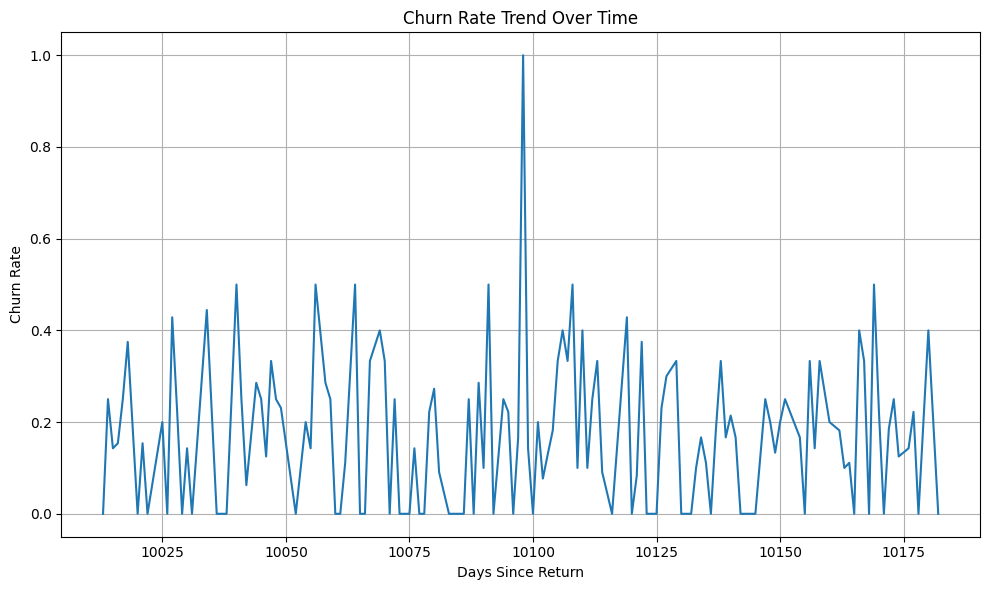

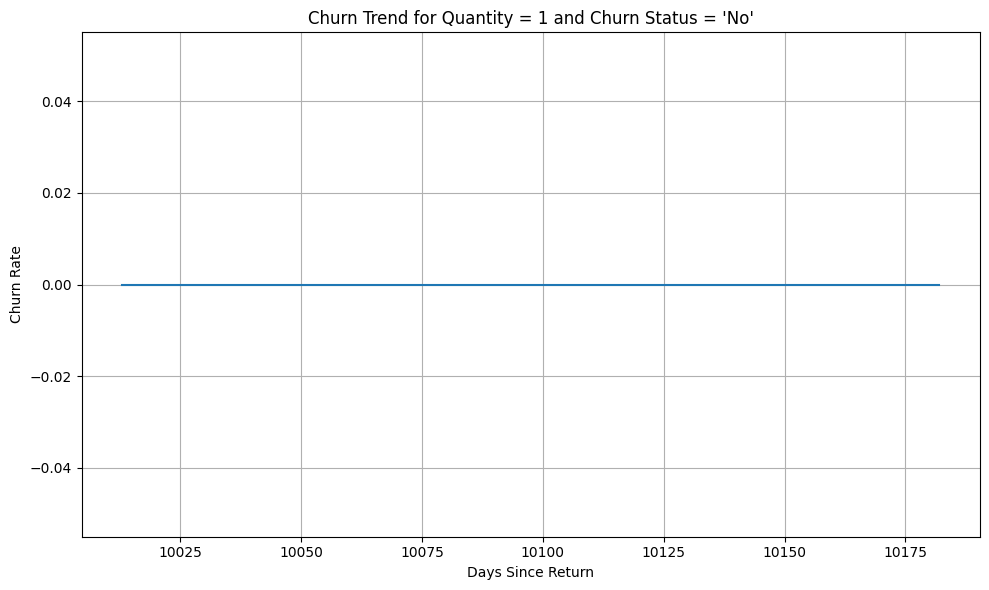


Overall Churn Rate: 17.60%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       254
           1       1.00      1.00      1.00        46

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300


Confusion Matrix:
[[254   0]
 [  0  46]]


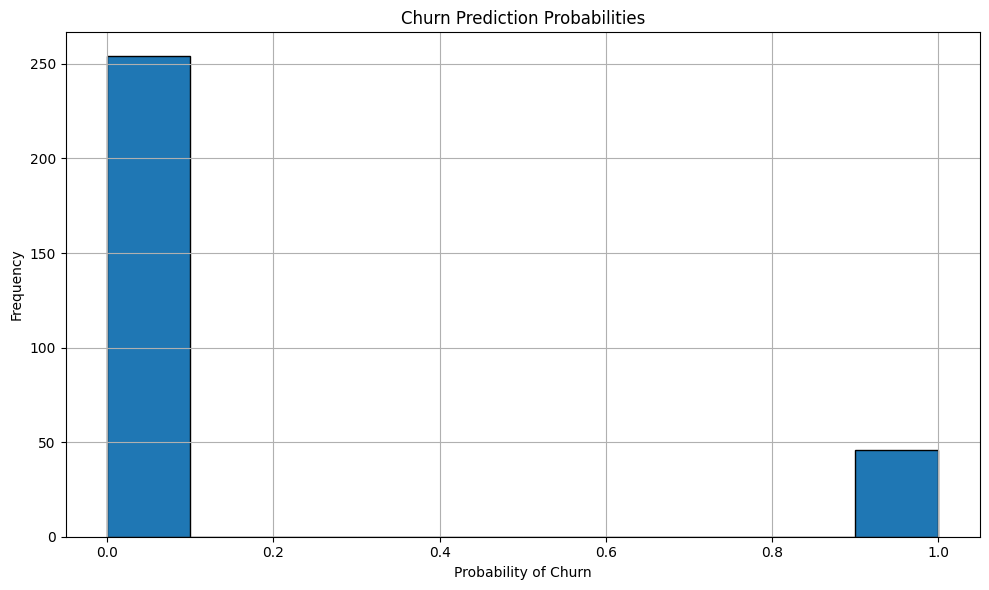

In [20]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

file_path = '/Users/sagarbochela/Desktop/Capstone proj/rreturns data.csv'

try:
    df = pd.read_csv(file_path)
    print("Dataset loaded successfully.")
except FileNotFoundError:
    raise SystemExit(f"File not found at {file_path}. Please check the file path.")

print("\nAvailable columns in the dataset:")
print(df.columns)

df.columns = df.columns.str.strip()

print("\nFirst few rows of the dataset:")
print(df.head())

if 'return_date' not in df.columns:
    print("\nWarning: 'return_date' column is missing or named differently.")
    raise KeyError("'return_date' column is missing.")

df['Churn Status'] = df['Churn Status'].str.strip().map({'Yes': 1, 'No': 0})

if df['Churn Status'].isnull().any():
    print("\nInvalid or missing values in 'Churn Status'.")
    print(df[df['Churn Status'].isnull()])
    raise ValueError("Ensure 'Churn Status' contains only 'Yes' and 'No'.")

df['return_date'] = pd.to_datetime(df['return_date'], errors='coerce')

if df['return_date'].isnull().any():
    print("\nWarning: Some 'return_date' values could not be converted to datetime.")
    print(df[df['return_date'].isnull()])

df['days_since_return'] = (pd.Timestamp.now() - df['return_date']).dt.days
df = df.drop(columns=['return_date'])

churn_conditions = df[(df['quantity'] == 1) & (df['Churn Status'] == 0)]

plt.figure(figsize=(10, 6))
df.groupby(df['days_since_return'])['Churn Status'].mean().plot()
plt.title("Churn Rate Trend Over Time")
plt.xlabel("Days Since Return")
plt.ylabel("Churn Rate")
plt.grid(True)
plt.tight_layout()
plt.show()

if not churn_conditions.empty:
    plt.figure(figsize=(10, 6))
    churn_conditions.groupby(churn_conditions['days_since_return'])['Churn Status'].mean().plot()
    plt.title("Churn Trend for Quantity = 1 and Churn Status = 'No'")
    plt.xlabel("Days Since Return")
    plt.ylabel("Churn Rate")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

total_customers = len(df)
churned_customers = df[df['Churn Status'] == 1]
churn_rate = len(churned_customers) / total_customers * 100
print(f"\nOverall Churn Rate: {churn_rate:.2f}%")

X = df.drop(columns=['Churn Status'])
y = df['Churn Status']

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

y_prob = model.predict_proba(X_test)[:, 1]

plt.figure(figsize=(10, 6))
plt.hist(y_prob, bins=10, edgecolor='black')
plt.title("Churn Prediction Probabilities")
plt.xlabel("Probability of Churn")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()


Dataset loaded successfully.

Available columns in the dataset:
Index(['return_date', 'product_id', 'store_id', 'quantity', 'Churn Status'], dtype='object')

First few rows of the dataset:
  return_date  product_id  store_id  quantity Churn Status
0    1/1/1997         250         6         1           No
1    1/1/1997         628         6         1           No
2    1/1/1997         869         6         1           No
3    1/2/1997         469        11         1           No
4    1/2/1997         532        23         2         Yes 


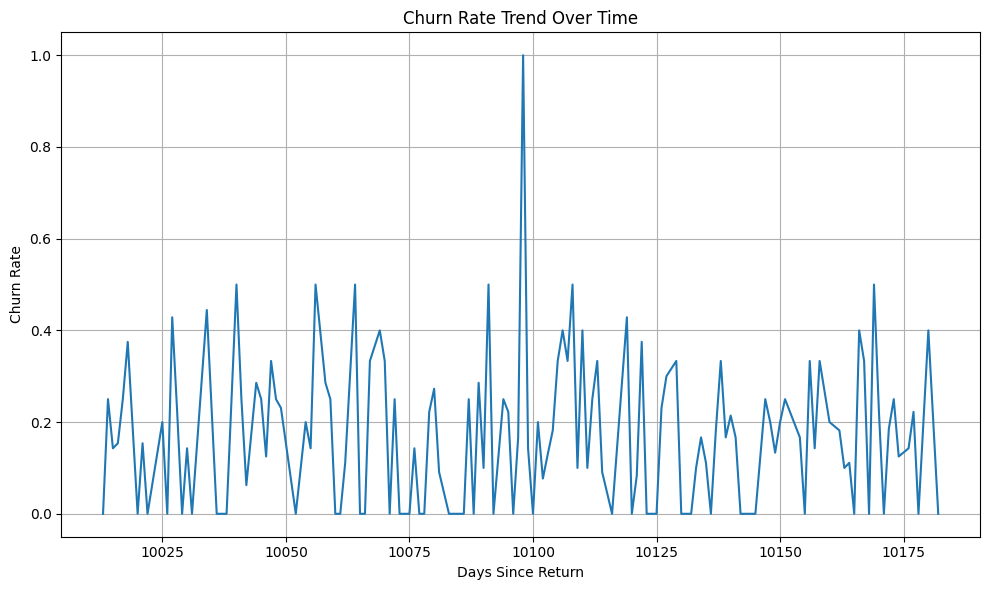

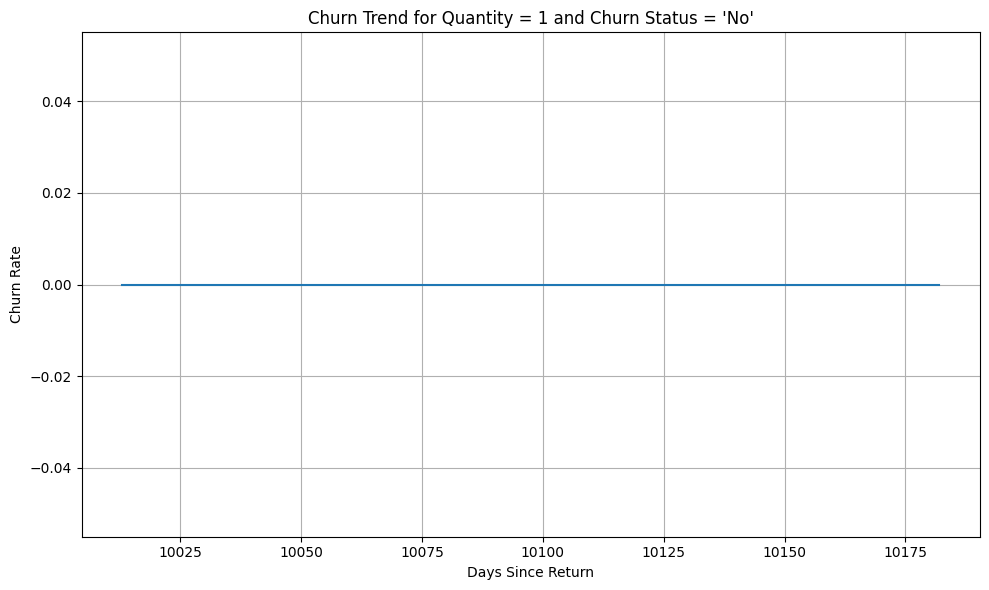


Overall Churn Rate: 17.60%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       254
           1       1.00      1.00      1.00        46

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300


Confusion Matrix:
[[254   0]
 [  0  46]]


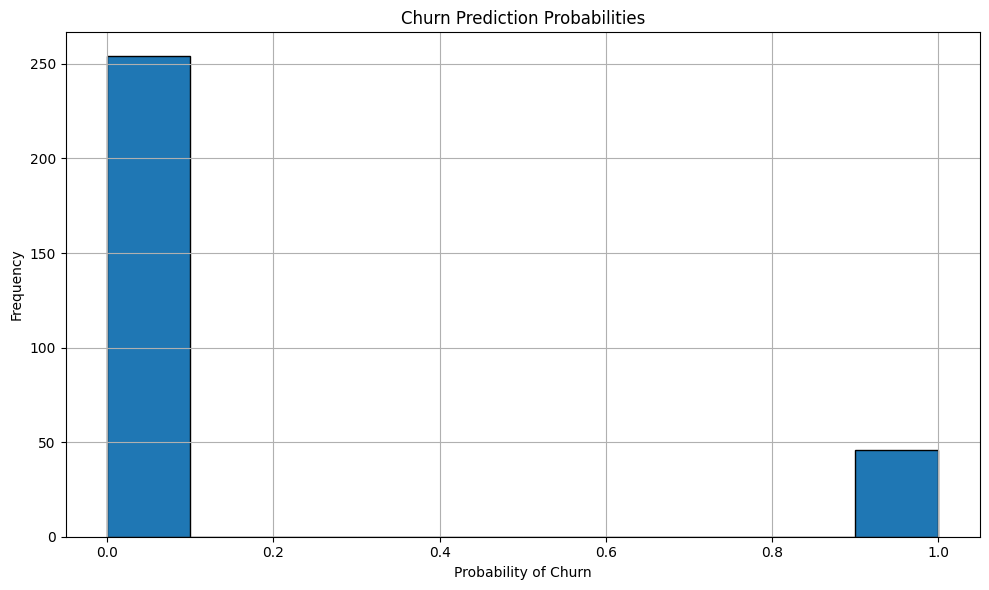

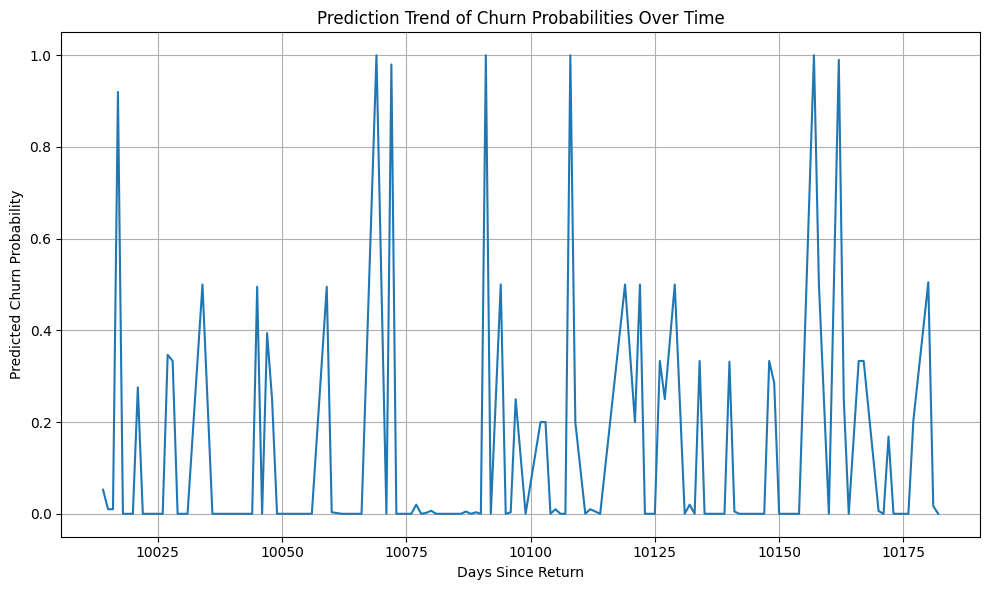

In [19]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

file_path = '/Users/sagarbochela/Desktop/Capstone proj/rreturns data.csv'

try:
    df = pd.read_csv(file_path)
    print("Dataset loaded successfully.")
except FileNotFoundError:
    raise SystemExit(f"File not found at {file_path}. Please check the file path.")

print("\nAvailable columns in the dataset:")
print(df.columns)

df.columns = df.columns.str.strip()

print("\nFirst few rows of the dataset:")
print(df.head())

if 'return_date' not in df.columns:
    print("\nWarning: 'return_date' column is missing or named differently.")
    raise KeyError("'return_date' column is missing.")

df['Churn Status'] = df['Churn Status'].str.strip().map({'Yes': 1, 'No': 0})

if df['Churn Status'].isnull().any():
    print("\nInvalid or missing values in 'Churn Status'.")
    print(df[df['Churn Status'].isnull()])
    raise ValueError("Ensure 'Churn Status' contains only 'Yes' and 'No'.")

df['return_date'] = pd.to_datetime(df['return_date'], errors='coerce')

if df['return_date'].isnull().any():
    print("\nWarning: Some 'return_date' values could not be converted to datetime.")
    print(df[df['return_date'].isnull()])

df['days_since_return'] = (pd.Timestamp.now() - df['return_date']).dt.days
df = df.drop(columns=['return_date'])

churn_conditions = df[(df['quantity'] == 1) & (df['Churn Status'] == 0)]

plt.figure(figsize=(10, 6))
df.groupby(df['days_since_return'])['Churn Status'].mean().plot()
plt.title("Churn Rate Trend Over Time")
plt.xlabel("Days Since Return")
plt.ylabel("Churn Rate")
plt.grid(True)
plt.tight_layout()
plt.show()

if not churn_conditions.empty:
    plt.figure(figsize=(10, 6))
    churn_conditions.groupby(churn_conditions['days_since_return'])['Churn Status'].mean().plot()
    plt.title("Churn Trend for Quantity = 1 and Churn Status = 'No'")
    plt.xlabel("Days Since Return")
    plt.ylabel("Churn Rate")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

total_customers = len(df)
churned_customers = df[df['Churn Status'] == 1]
churn_rate = len(churned_customers) / total_customers * 100
print(f"\nOverall Churn Rate: {churn_rate:.2f}%")

X = df.drop(columns=['Churn Status'])
y = df['Churn Status']

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

y_prob = model.predict_proba(X_test)[:, 1]

plt.figure(figsize=(10, 6))
plt.hist(y_prob, bins=10, edgecolor='black')
plt.title("Churn Prediction Probabilities")
plt.xlabel("Probability of Churn")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

X_test['Churn Probabilities'] = y_prob
X_test['days_since_return'] = df.loc[X_test.index, 'days_since_return']

predicted_trend = X_test.groupby('days_since_return')['Churn Probabilities'].mean()

plt.figure(figsize=(10, 6))
predicted_trend.plot()
plt.title("Prediction Trend of Churn Probabilities Over Time")
plt.xlabel("Days Since Return")
plt.ylabel("Predicted Churn Probability")
plt.grid(True)
plt.tight_layout()
plt.show()


Dataset loaded successfully.

Available columns in the dataset:
Index(['return_date', 'product_id', 'store_id', 'quantity', 'Churn Status'], dtype='object')

First few rows of the dataset:
  return_date  product_id  store_id  quantity Churn Status
0    1/1/1997         250         6         1           No
1    1/1/1997         628         6         1           No
2    1/1/1997         869         6         1           No
3    1/2/1997         469        11         1           No
4    1/2/1997         532        23         2         Yes 

Model training complete.


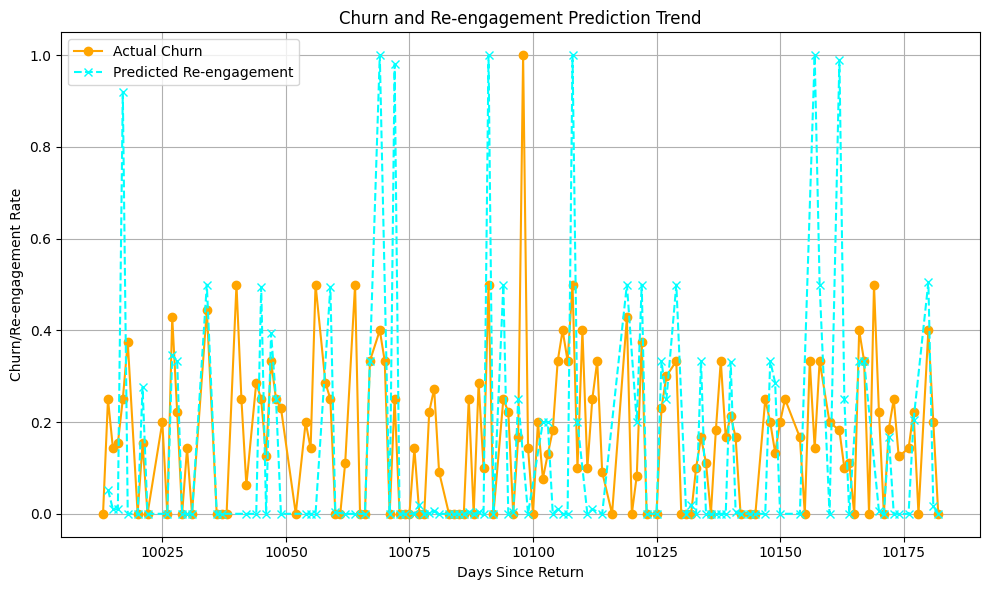

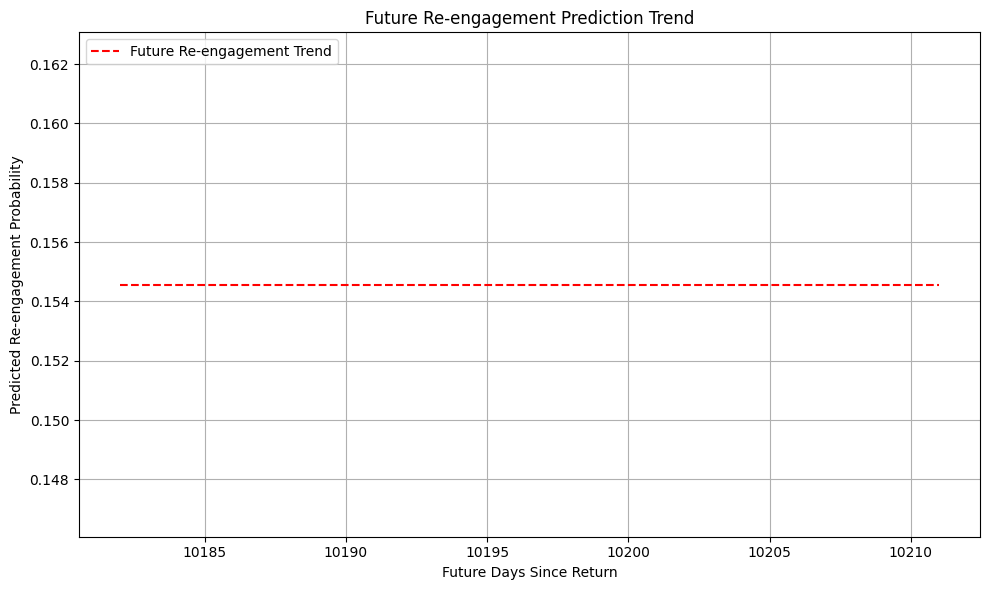

In [13]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

file_path = '/Users/sagarbochela/Desktop/Capstone proj/rreturns data.csv'

try:
    df = pd.read_csv(file_path)
    print("Dataset loaded successfully.")
except FileNotFoundError:
    raise SystemExit(f"File not found at {file_path}. Please check the file path.")

print("\nAvailable columns in the dataset:")
print(df.columns)

df.columns = df.columns.str.strip()

print("\nFirst few rows of the dataset:")
print(df.head())

if 'return_date' not in df.columns:
    print("\nWarning: 'return_date' column is missing or named differently.")
    raise KeyError("'return_date' column is missing.")

df['Churn Status'] = df['Churn Status'].str.strip().map({'Yes': 1, 'No': 0})

if df['Churn Status'].isnull().any():
    print("\nInvalid or missing values in 'Churn Status'.")
    print(df[df['Churn Status'].isnull()])
    raise ValueError("Ensure 'Churn Status' contains only 'Yes' and 'No'.")

df['return_date'] = pd.to_datetime(df['return_date'], errors='coerce')

if df['return_date'].isnull().any():
    print("\nWarning: Some 'return_date' values could not be converted to datetime.")
    print(df[df['return_date'].isnull()])

df['days_since_return'] = (pd.Timestamp.now() - df['return_date']).dt.days

df = df.drop(columns=['return_date'])

churn_conditions = df[(df['quantity'] == 1) & (df['Churn Status'] == 0)]

plt.figure(figsize=(10, 6))

df.groupby(df['days_since_return'])['Churn Status'].mean().plot(label="Actual Churn", color='orange', linestyle='-', marker='o')

X = df.drop(columns=['Churn Status'])
y = df['Churn Status']

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

print("\nModel training complete.")

y_pred = model.predict(X_test)

if hasattr(model, "predict_proba"):
    y_prob = model.predict_proba(X_test)[:, 1]
else:
    raise ValueError("The model does not support probability predictions.")

X_test['Re-engagement Probabilities'] = y_prob
X_test['days_since_return'] = df.loc[X_test.index, 'days_since_return']

predicted_trend = X_test.groupby('days_since_return')['Re-engagement Probabilities'].mean()

predicted_trend.plot(label="Predicted Re-engagement", color='cyan', linestyle='--', marker='x')

plt.title("Churn and Re-engagement Prediction Trend")
plt.xlabel("Days Since Return")
plt.ylabel("Churn/Re-engagement Rate")
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

future_days = range(df['days_since_return'].max(), df['days_since_return'].max() + 30)

future_predictions = [y_prob.mean()] * 30

plt.figure(figsize=(10, 6))
plt.plot(future_days, future_predictions, label="Future Re-engagement Trend", color='red', linestyle='--')
plt.title("Future Re-engagement Prediction Trend")
plt.xlabel("Future Days Since Return")
plt.ylabel("Predicted Re-engagement Probability")
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()
